In [1]:
from google.colab import drive
drive.mount('/content/drive')


Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
np.printoptions(np.inf)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_data =  pd.read_csv('/content/drive/My Drive/4_BIG_MART/Train.csv')
test_data = pd.read_csv('/content/drive/My Drive/4_BIG_MART/Test.csv')

print(train_data.shape)
print(test_data.shape)

data = train_data.append(test_data,ignore_index=True,sort=False)
data = pd.DataFrame(data,columns=data.columns)

(8523, 12)
(5681, 11)


In [4]:
print(data.shape)
data.head(10)

(14204, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
data.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14202,FDJ26,15.3,Regular,0.00000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.10472,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [6]:
data.iloc[8521:8525]
# so test data will  start from 8523

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700
8523,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [7]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<h1><b>1. 
Basic EDA Feature wise

# <h2><b> 1.1 Item_Identifier

In [8]:
print('No of unique item in BIG_MART is : ',len(pd.Series(data['Item_Identifier']).unique()))
print('Check is there any null value for Item_Identifier : ',pd.isnull(data['Item_Identifier']).any())

No of unique item in BIG_MART is :  1559
Check is there any null value for Item_Identifier :  False


#<h2><b> 1.2 Item_Weight---Realvalue

In [9]:
print('Check is there any null value for Item_Weight : ',pd.isnull(data['Item_Weight']).any())
print('No of item with null Item_Weight : ' ,sum(pd.isnull(data['Item_Weight'])))

Check is there any null value for Item_Weight :  True
No of item with null Item_Weight :  2439


In [10]:
missing_weight_index = pd.isnull(data['Item_Weight'])
data.iloc[list(missing_weight_index)].head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [0]:
groupby_item_identifier = data.groupby('Item_Identifier')
a = groupby_item_identifier.mean()['Item_Weight']

def weight_missing(row):
    if pd.isnull(row['Item_Weight']):
        return a.loc[row['Item_Identifier']]
    else:
        return row['Item_Weight']

In [0]:
data['Item_Weight'] = data[['Item_Identifier','Item_Weight']].apply(lambda x: weight_missing(x),axis=1)

In [13]:
data['Item_Weight'].head(20)

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7     19.000
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18     8.260
19    13.350
Name: Item_Weight, dtype: float64

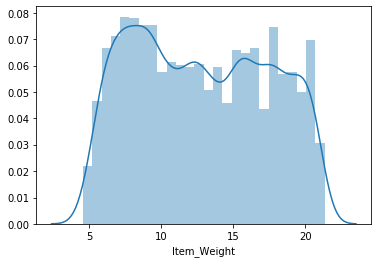

In [14]:
sns.distplot(data['Item_Weight'])

# <h2><b>1.3 Item_Fat_Content---Categorical (Low Fat, Regular)

In [15]:
print('Check Null value for Item_Fat_Content',data['Item_Fat_Content'].isnull().any())

Check Null value for Item_Fat_Content False


In [16]:
print(data['Item_Fat_Content'].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [17]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


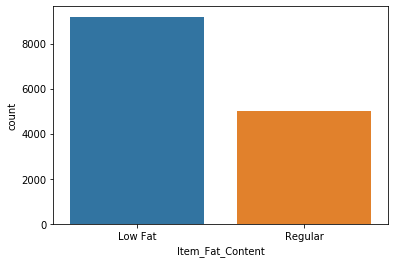

In [18]:
sns.countplot(data['Item_Fat_Content'])

In [0]:
ohe = OneHotEncoder()
label_fat = ohe.fit_transform(np.array(data['Item_Fat_Content']).reshape(-1,1))
label_fat = label_fat.toarray()
label_fat = pd.DataFrame(label_fat,columns=['Item_Fat_Content_0','Item_Fat_Content_1'])
data[['Item_Fat_Content_0','Item_Fat_Content_1']] = label_fat[['Item_Fat_Content_0','Item_Fat_Content_1']]

In [20]:
data.drop(['Item_Fat_Content'],axis=1,inplace=True)
data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Fat_Content_0', 'Item_Fat_Content_1'],
      dtype='object')

# <h2><b>1.4 Item_Visibility---Realvalue

Here some if item_visibility is 0 which is notpossible 

In [21]:
print('Check Null value for Item_Fat_Content :',data['Item_Visibility'].isnull().any())
print('No of item with visibility = 0 is : ',data[data['Item_Visibility'] == 0].shape[0])

Check Null value for Item_Fat_Content : False
No of item with visibility = 0 is :  879


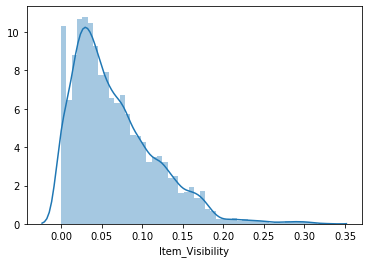

In [22]:
sns.distplot(data['Item_Visibility'])

In [23]:
a = data.groupby('Item_Identifier').mean()['Item_Visibility']
print(a)
def missing_visibility(row):
    if row['Item_Visibility'] == 0:
        return a.loc[row['Item_Identifier']]
    else:
        return row['Item_Visibility']

Item_Identifier
DRA12    0.034938
DRA24    0.045646
DRA59    0.133384
DRB01    0.079736
DRB13    0.006799
           ...   
NCZ30    0.027302
NCZ41    0.056396
NCZ42    0.011015
NCZ53    0.026330
NCZ54    0.081345
Name: Item_Visibility, Length: 1559, dtype: float64


In [0]:
data['Item_Visibility'] = data[['Item_Identifier','Item_Visibility']].apply(lambda x : missing_visibility(x),axis=1)

In [25]:
print('No of item with visibility = 0 is : ',data[data['Item_Visibility'] == 0].shape[0])

No of item with visibility = 0 is :  0


# <h2><b>1.5 Item_Type---Categorical()

In [26]:
print('Check Null value for Item_Type :',data['Item_Type'].isnull().any())

Check Null value for Item_Type : False


In [27]:
data['Item_Type'].value_counts()


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

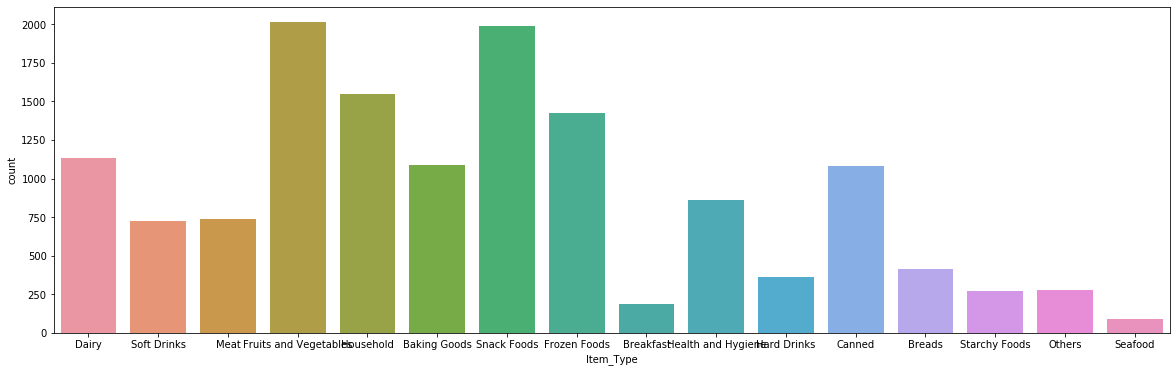

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(data['Item_Type'])

In [0]:
# here we replace 16 category to 3 category
data['Item_Type'] = data['Item_Identifier'].apply(lambda x : x[:2])


In [0]:
ohe = OneHotEncoder()
label_fat = ohe.fit_transform(np.array(data['Item_Type']).reshape(-1,1))
label_fat = label_fat.toarray()
label_fat = pd.DataFrame(label_fat,columns=['Item_Type_0','Item_Type_1','Item_Type2'])
data[['Item_Type_0','Item_Type_1','Item_Type2']] = label_fat[['Item_Type_0','Item_Type_1','Item_Type2']]

In [0]:
data.drop(['Item_Type'],axis=1,inplace=True)

In [32]:
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type2'],
      dtype='object')


# <h2><b>1.6 Item_MRP---Realvalue

In [33]:
print('Check Null value for Item_MRP :',data['Item_MRP'].isnull().any())

Check Null value for Item_MRP : False


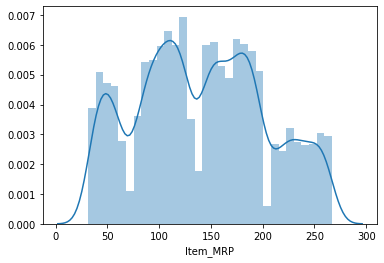

In [34]:
sns.distplot(data['Item_MRP'])

# <h2><b> 1.7 Outlet_Identifier

In [35]:
print('No of unique outlet in BIG_MART is : ',len(pd.Series(data['Outlet_Identifier']).unique()))
print('Check is there any null value for Outlet_Identifier : ',pd.isnull(data['Outlet_Identifier']).any())

No of unique outlet in BIG_MART is :  10
Check is there any null value for Outlet_Identifier :  False


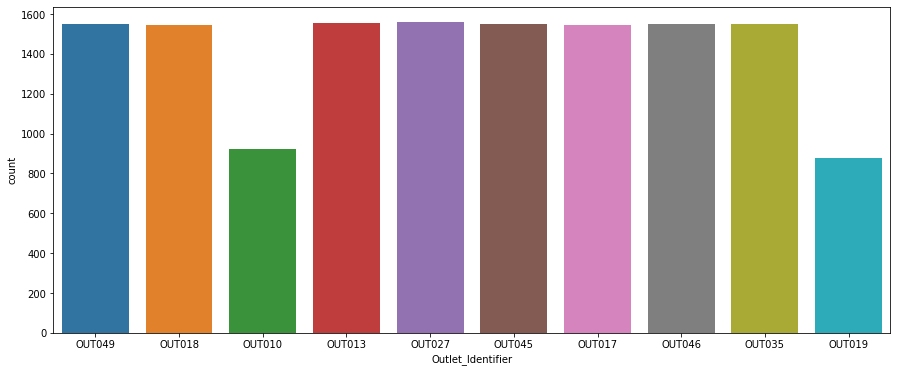

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(data['Outlet_Identifier'])
# No of outlet for eeach outlet_identifier

In [0]:
la = ['Outlet_Identifier_'+str(i) for i in range(0,10)]

In [0]:
ohe = OneHotEncoder()
label_fat = ohe.fit_transform(np.array(data['Outlet_Identifier']).reshape(-1,1))
label_fat = label_fat.toarray()
label_fat = pd.DataFrame(label_fat,columns=la)
data[la] = label_fat[la]

In [39]:
data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9'],
      dtype='object')

# <h2><b> 1.8 Outlet_Size---Categorical(small,medium,high)

In [40]:
print('Check for Null value in Outlet_Size : ',data['Outlet_Size'].isnull().any())
# replace null value with outlet size 
# outletsize depend on outlettype

Check for Null value in Outlet_Size :  True


In [41]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [42]:
a = data.groupby(['Outlet_Type','Outlet_Size'])
a.count()

Item_Identifier  ...  Outlet_Identifier_9
Outlet_Type       Outlet_Size                   ...                     
Grocery Store     Small                    880  ...                  880
Supermarket Type1 High                    1553  ...                 1553
                  Medium                  1550  ...                 1550
                  Small                   3100  ...                 3100
Supermarket Type2 Medium                  1546  ...                 1546
Supermarket Type3 Medium                  1559  ...                 1559

[6 rows x 23 columns]

According above we replace this like :

small : Grocery Store,Supermarket1

medium : Supermarket2,Supermarket3


In [0]:
def outlet_size(row):
    if row in ['Grocery Store','Supermarket Type1']:
        return 'Small'
    elif row in ['Supermarket Type2','Supermarket Type3']:
        return 'Medium'
data['Outlet_Size'] = data['Outlet_Type'].apply(lambda x : outlet_size(x))

In [44]:
print('Check for Null value in Outlet_Size : ',data['Outlet_Size'].isnull().any())

Check for Null value in Outlet_Size :  False


In [45]:
data['Outlet_Size'].value_counts()

Small     11099
Medium     3105
Name: Outlet_Size, dtype: int64

In [0]:
ohe = OneHotEncoder()
label_fat = ohe.fit_transform(np.array(data['Outlet_Size']).reshape(-1,1))
label_fat = label_fat.toarray()
label_fat = pd.DataFrame(label_fat,columns=['Outlet_Size_0','Outlet_Size_1'])
data[['Outlet_Size_0','Outlet_Size_1']] = label_fat[['Outlet_Size_0','Outlet_Size_1']]

In [0]:
data.drop(['Outlet_Size'],axis=1,inplace=True)

In [48]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Outlet_Size_0', 'Outlet_Size_1'],
      dtype='object')

# <h2><b> 1.9 Outlet_Type---Categorical(Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3)

In [0]:
ohe = OneHotEncoder()
label_fat = ohe.fit_transform(np.array(data['Outlet_Type']).reshape(-1,1))
label_fat = label_fat.toarray()
label_fat = pd.DataFrame(label_fat,columns=['Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3'])
data[['Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3']] = label_fat[['Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3']]

In [50]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

# Data Preparation

In [0]:
data_f = data[[ 'Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales','Outlet_Establishment_Year',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3']].copy()

In [0]:
from sklearn.preprocessing import StandardScaler
data_f.iloc[:,0:5] = StandardScaler().fit_transform(data_f.iloc[:,0:5])


In [0]:
test_data = data_f.iloc[8523:].copy()
train_data = data_f.iloc[:8522].copy()
test_data.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

train_y = train_data['Item_Outlet_Sales']
train_x = train_data[[ 'Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3']]

test_x = test_data


In [95]:
train_y

0       0.910601
1      -1.018440
2      -0.049238
3      -0.849103
4      -0.695373
          ...   
8517    0.836467
8518    0.349915
8519   -0.956402
8520   -0.579100
8521   -0.196725
Name: Item_Outlet_Sales, Length: 8522, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_cv,y_train,y_cv = train_test_split(train_x,train_y,test_size=0.2)



# <h1> <b> Model

In [0]:
from math import sqrt


# <b>1: LinearRegression

MSE :  0.42084754880941616
RMSE :  0.6487276383887279


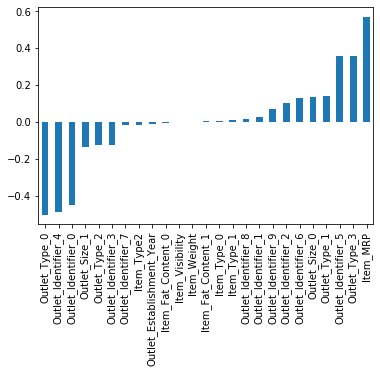

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(normalize=True)
model.fit(x_train,y_train)
pred_cv = model.predict(x_cv)
print('MSE : ',mean_squared_error(y_cv,pred_cv))
print('RMSE : ',sqrt(mean_squared_error(y_cv,pred_cv)))

coef = pd.Series(model.coef_,x_cv.columns).sort_values()
coef.plot(kind='bar')

# <b>2: SGDRegressor 

0.4212724339519844


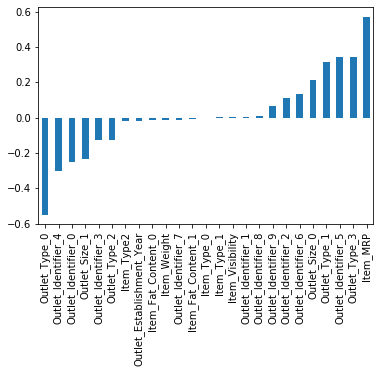

In [99]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
h = model.fit(x_train,y_train)
pred_cv=model.predict(x_cv)
print(mean_squared_error(y_cv,pred_cv))
coef = pd.Series(model.coef_,x_cv.columns).sort_values()
coef.plot(kind='bar')

# <b>3: SVR 

In [100]:
from sklearn.svm import SVR
model = SVR(kernel='linear',C=1)
h = model.fit(x_train,y_train)
pred_cv=model.predict(x_cv)
print(mean_squared_error(y_cv,pred_cv))

0.42813242389554507


# <b>3: RandomForest

In [101]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_leaf=100,n_jobs=4)
h = model.fit(x_train,y_train)
pred_cv=model.predict(x_cv)
print('MSE : ',mean_squared_error(y_cv,pred_cv))
print('RMSE : ',sqrt(mean_squared_error(y_cv,pred_cv)))
print()

MSE :  0.381233526692771
RMSE :  0.6174411119230488

